In [1]:
# -*- coding : utf-8 -*-

In [2]:
import re
from os import listdir
import os.path
import pandas as pd
import types
import numpy as np
import logging
from configs import *
import configs
from datetime import datetime

In [3]:
from ImageFactory import *

In [4]:
from models import Document, Chapter
document = Document()

In [5]:
def is_file_re_match_in_ospath(re_match_content, ospath):
    for filename in os.listdir(ospath):
        if re.match(re_match_content,filename):
            return True
    return False

In [6]:
if not is_file_re_match_in_ospath('product-request', './data_or_source'):
    % run fetch_data_from_keepa.ipynb
else:
    print("Keepa data has been fetched")

Keepa data has been fetched


In [7]:
from kpdata import kpdata
from kpdata import jsdata, correct_coefficient, df_market_trends, df_indicator_trend

/Users/zhanglinshu/Documents/market_trend_analysis/template/amz-market-trend-analysis-Women's Sandals-20180524/kpdata.py:90: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_market_trends.nan = nan_count
		Review_count: 23.083333333333332
		Price: 40.355555555555554
		Bsr: 16.261111111111113



In [8]:
df_indicator_trend.columns = ['日期',
                              '平均价格({})'.format(currency_symbol),
                              '平均价格变动量({})'.format(currency_symbol),
                              '平均评论数','评论总数','评论总数变动量','平均评论星级','平均评论星级变动量','平均BSR','平均BSR变动量','预测销售量']

In [9]:
jsdata()
kpdata()

去重后商品数为：101
预测月销售量为220547


In [10]:
correct_coefficient

{'bsr': 0.2659191410937129,
 'date': 1,
 'estimate_sales': 1.6459180720259929,
 'price': 0.49452450824873084,
 'rating': 1.0093222978685534,
 'review_count_mean': 1.1576690979595605,
 'review_count_sum': 1.1576690979595605}

In [11]:
metadata = {'month': datetime.today().month,
            'category_name': category_name}

In [12]:
# %run ImageFactory.py
# from models import Document

In [13]:
document.sales_sum = (list(df_indicator_trend['预测销售量'])[-1]*30).__int__()

document.chapters[0].title = '一、市场概况'
document.chapters[0].foreword = """本文选取2017年{}月亚马逊{}站Best 
Sellers榜单中{}品类下的Top100商品作为市场研究目标。""".format(metadata['month'],
                                              region[0],
                                              jsdata.category_name)
document.chapters[0].subchapters[0].title = """1. 销量分布{},
品牌竞争压力{}""".format(jsdata.sales.concentration_verdict,
                     jsdata.brand.competitive_pressure)
document.chapters[0].subchapters[0].content = """
本期{}品类Best Sellers榜单中，总体销售水平{}，销量分布{}，
销售量排名前10%的商品占据总销售量的{}%{}。
榜单中有{}个品牌，品牌{}，{}{}品类市场品牌竞争压力{}。
商品平均上架天数为{}天，产品更新迭代{}。{}
""".format(jsdata.category_name,
           jsdata.sales.sum_verdict,
           jsdata.sales.concentration_verdict,
           jsdata.sales.top_10_percentage,
           '，排名靠后的商品同样有销售机会' if jsdata.sales.concentration_verdict=="非常分散" else '', 
           jsdata.brand.count, 
           jsdata.brand.count_verdict, 
           jsdata.brand.review, 
           jsdata.brand.review_added, 
           jsdata.brand.competitive_pressure,
           kpdata.added_time.added_duration_mean,
           kpdata.added_time.update_rate,
           kpdata.added_time.top5_added_text
          )
document.chapters[0].subchapters[1].title = '2.'
document.chapters[0].subchapters[1].content = """
在本期{}品类Best Sellers榜单前一百的商品中，商品最高价${:.2f}，最低价${:.2f}，平均价格${:.2f}。
该品类商品价格跨度{}，
""".format(jsdata.category_name,
          jsdata.price.max,
          jsdata.price.min,
          jsdata.price.mean,
          jsdata.price.span_verdict
          )

document.chapters[0].subchapters[2].title = """3. 总体评论数{}，商品竞争压力{}
""".format(jsdata.review.mean_verdict,
          jsdata.review.competitive_pressure)
document.chapters[0].subchapters[2].content = """
在本期{}品类Best Sellers榜单前一百的商品中，单个商品拥有的最大评论数为{}，最小评论数为{}条，
平均评论数约{:.2f}条，评论平均星级约{:.2f}星。该品类商品总体评论数{}，{}{}商品竞争压力{}。
""".format(jsdata.category_name,
           jsdata.review.max,
           jsdata.review.min,
           jsdata.review.mean,
           jsdata.rating.mean,
           jsdata.review.mean_verdict,
           jsdata.review.added_text,
           jsdata.review.bestsellers,
           jsdata.review.competitive_pressure
          )

document.chapters[0].subchapters[3].title = """4. 平均评论星级{}，产品改进空间{}
""".format(jsdata.rating.mean_verdict,
          jsdata.rating.improved_space)
document.chapters[0].subchapters[3].content = """
在本期{}品类Best Sellers榜单前一百的商品中，商品评论星级最高为{}星，最低为{}星，
平均评论星级{:.2f}星。{}
""".format(jsdata.category_name,
           jsdata.rating.max,
           jsdata.rating.min,
           jsdata.rating.mean,
           jsdata.rating.added_text
          )

document.chapters[0].subchapters[4].title = """5. {}
""".format(jsdata.bb_seller.seller_friendliness)
document.chapters[0].subchapters[4].content = """
在本期{}品类Best Sellers榜单前一百的商品中，{}
""".format(jsdata.category_name,
           jsdata.bb_seller.added_text
          )

document.chapters[1].title = '二、指标趋势'
document.chapters[1].subchapters[0].title = """1. 市场价格波动风险{}
""".format(kpdata.price.std_verdict)
document.chapters[1].subchapters[0].content = """
近6个月内{}品类Best Sellers榜单Top100商品的平均价格为${:.2f}，
半年内最高平均价格为${:.2f}，最低平均价格为${:.2f}。价格波动{}，市场价格波动风险{}。
""".format(jsdata.category_name,
           kpdata.price.mean,
           kpdata.price.max,
           kpdata.price.min,
           kpdata.price.std_verdict,
           kpdata.price.std_verdict
          )

document.chapters[1].subchapters[1].title = """2. 评论数{}，增长{}
""".format(jsdata.review.mean_verdict,
          kpdata.review.grow_rate_verdict)
document.chapters[1].subchapters[1].content = """
{}品类Best Sellers榜单商品评论数{}，近6个月内总评论数从期初{:.0f}条增长到期末{:.0f}条，增长{:.2f}%，增长{}。
半年内有{}款新上架的商品，平均评论量受影响""".format(jsdata.category_name,
           jsdata.review.mean_verdict,
           kpdata.review.data[0],
           kpdata.review.data[180],
           kpdata.review.grow_rate*100,
           kpdata.review.grow_rate_verdict,
           kpdata.added_time.added_product_count
          )

document.chapters[1].subchapters[2].title = """3. 评论星级波动{}，消费者的市场偏好{}
""".format(kpdata.rating.std_verdict,
          kpdata.rating.market_preference_stability)
document.chapters[1].subchapters[2].content = """
{}品类Best Sellers榜单商品的平均评论星级波动{}，消费者的市场偏好{}。
""".format(jsdata.category_name,
           kpdata.rating.std_verdict,
           kpdata.rating.market_preference_stability
          )

In [14]:
def get_image_url(asin):
    image_url = './image/{}.jpg'.format(asin)
    return "<img src=\"{}\">".format(image_url)
    
def format_table(dataframe):
    df = dataframe.fillna('-').copy()
    int_columns = ['Sales', 'Reviews']
    for column in int_columns:
        df[column] = df[column].map(int)
    for index, asin in df['ASIN'].iteritems():
        df.loc[index, 'Image'] = get_image_url(asin)
    return df

In [15]:
df_top5 = jsdata.data.head(5)
formated_table = format_table(df_top5)[['ASIN', 'Image', 'Price', 'Brand', 'Sales', 'Reviews', 'Rating']]
formated_table.columns = ['ASIN', '商品图片', '价格({})'.format(currency_symbol), '品牌', '预测月销量', '评论数', '评论星级']
formated_table

ASIN                                商品图片  价格($)           品牌  预测月销量  \
0  B01H94Y3XE  <img src="./image/B01H94Y3XE.jpg">  12.95        Sanuk  24952   
1  B008KK0ZJ8  <img src="./image/B008KK0ZJ8.jpg">  17.76       CLARKS   6791   
2  B016MD0VUW  <img src="./image/B016MD0VUW.jpg">  13.95     Blowfish   6726   
3  B01F184Q5A  <img src="./image/B01F184Q5A.jpg">  24.95        Plaka   5225   
4  B002LZUS40  <img src="./image/B002LZUS40.jpg">  89.95  Birkenstock   4977   

     评论数  评论星级  
0  10156   4.5  
1   8089   5.0  
2    898   4.5  
3   1703   4.5  
4   4581   4.5

In [16]:
document.chapters[0].subchapters[0].tables.append(formated_table)

In [17]:
image = ImageBar(labels=jsdata.data.ASIN[0:5],
                 data=jsdata.sales.data[0:5],
                 title=u'榜单 Top 5 商品预测月销售量',
                 xticks_rotation='horizontal'
                )
image.xticks_font.set_size(10)
image.init()
document.chapters[0].subchapters[0].set_image(image.fig)
image.fig

In [18]:
def distribution_table(series_data,
                      truncation_number=1000,
                      space_auto=True,
                      space=10,
                      space_power=1,
                      unit_symbol=currency_symbol
                      ):
    """
    把数据划分出不同区间，然后计算各个区间的频率

    Parameters
    ----------
    truncation_number : 图表截断值，即区间范围的最大值
    space_auto : 是否自动确定组间距离
    space : 组间距离，即各个区间的范围
    space_power : 组间距离乘数，本身组间距离的增大方式为：当组间距离<=5时，每次加1，当>5时，每次加5
                  二档组间距离乘数为100时，则当组间距离<=500时，每次加100，当>500时，每次加500
    unit_symbol : x轴标签的单位符号，当unit_symbol='$'，x轴0-10区间的标签为$0-$10
                  而当unit_symbol='$'，x轴0-10区间的标签为0-10
    """
    
    data_max = series_data.max()
    repeat_times = 0
    while True:
        data_last = 0
        data_count = {}
        labels = []
        for data in range(0, int(data_max+1), space):
            if data < truncation_number:
                data_count['{}{}-{}{}'.format(unit_symbol, data_last, unit_symbol, data)]\
                = sum((series_data < data) & (series_data >= data_last))
                data_last = data
            else:
                data_count['{}{}以上'.format(unit_symbol, truncation_number)]\
                = sum((series_data >= truncation_number))

        if space_auto:
            if sum(map(lambda x : x != 0, data_count.values()))>14:
                space += 1*space_power if space<5*space_power else 5*space_power
            elif sum(map(lambda x : x != 0, data_count.values()))>8:
                break
            else:
                space -= 1*space_power if space<5*space_power else 5*space_power

            repeat_times += 1
            if repeat_times > 30:
                logging.warning("循环次数过多，无法自动确认组间距")
                break
        else:
            break

    if sum(map(lambda x : x != 0, data_count.values()))>14:
        logging.warning("存在分组数大于14，请手动调节组间距和最大截断值")
    df_data = pd.DataFrame({'labels':list(data_count.keys()), 
                            'count':list(data_count.values())}
                           )

    df_data = df_data.dropna()
    df_data = df_data[df_data['count'] != 0]
    return df_data.assign(percentage = lambda x: x['count']/sum(x['count']))


In [19]:
df_data = jsdata.data

price_mean = np.nanmean(df_data.Price)
price_max = np.max(df_data.Price)
space = 4
auto_space = True

while True:
    price_last = 0
    price_count = []
    sales = []
    labels = []
    for price in range(0, int(price_max+1), space):
        if currency_symbol == '$':
            labels.append('\{}{}-{}{}'.format(currency_symbol, price_last, currency_symbol, price))
        else:
            labels.append('{}{}-{}{}'.format(currency_symbol, price_last, currency_symbol, price))
        price_count.append(sum((df_data.Price < price) & (df_data.Price >= price_last)))    
        sales.append(np.nanmean(df_data.Sales[(df_data.Price < price) & (df_data.Price >= price_last)]))  
        price_last = price
    if not auto_space:
        break
    if sum(map(lambda x : x != 0, price_count))>14:
        space += 1 if space<10 else 5
    elif sum(map(lambda x : x != 0, price_count))>8:
        break
    else:
        space -= 1 if space<10 else 5

dtype = {'labels':'str', 'price_count':'int', 'sales_mean':'int'}
df_price_and_sales = pd.DataFrame({'labels':labels,
                                     'price_count':price_count,
                                    'sales_mean':sales
                                    })
df_price_and_sales = df_price_and_sales.dropna()
df_price_and_sales.loc[:, 'price_count'] = (df_price_and_sales['price_count']/df_price_and_sales['price_count'].sum()*100.0).round(0)
df_price_and_sales = df_price_and_sales[df_price_and_sales['price_count']!=0]

/Users/zhanglinshu/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


有双轴需要设置副轴grid


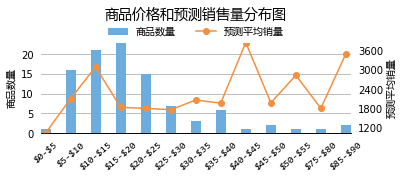

In [20]:
image = ImageTwinx(data=df_price_and_sales['price_count'],
                   title='商品价格和预测销售量分布图',
                   labels=df_price_and_sales['labels'],
                   legend_name=['商品数量', '预测平均销量'],
                   y2=df_price_and_sales.sales_mean,
                   title_y = 1.2
                  )

image.init()
document.chapters[0].subchapters[1].set_image(image.fig)
image.fig

In [21]:
df_price_and_sales

labels  price_count   sales_mean
1     \$0-$5          1.0  1032.000000
2    \$5-$10         16.0  2103.125000
3   \$10-$15         21.0  3097.952381
4   \$15-$20         23.0  1837.304348
5   \$20-$25         15.0  1805.666667
6   \$25-$30          7.0  1761.285714
7   \$30-$35          3.0  2065.000000
8   \$35-$40          6.0  1966.833333
9   \$40-$45          1.0  3858.000000
10  \$45-$50          2.0  1979.000000
11  \$50-$55          1.0  2836.000000
16  \$75-$80          1.0  1808.000000
18  \$85-$90          2.0  3509.000000

In [22]:
document.chapters[0].subchapters[1].content

"\n在本期Women's Sandals品类Best Sellers榜单前一百的商品中，商品最高价$109.95，最低价$3.39，平均价格$22.67。\n该品类商品价格跨度较大，\n"

In [23]:
price_review_add = """
价格分布较为分散，
在$18-$24的商品最多，有23款商品，不过市场已经较为饱和；
$30-$36有着最高的预测平均效率，有10款商品，尚存市场空间。
"""
document.chapters[0].subchapters[1].content += price_review_add
document.chapters[0].subchapters[1].title = '2. $30-$36尚存市场空间'

In [24]:
if df_price_and_sales.price_count.values.argmax() == df_price_and_sales.sales_mean.values.argmax():
    df_sales_enough = jsdata.data[5:][jsdata.data[5:]['Sales']>df_price_and_sales['sales_mean'].max()]
    df_choosed = df_sales_enough[(df_sales_enough['Price']<(df_price_and_sales.price_count.values.argmax()-1)*space)
                   | (df_sales_enough['Price']>(df_price_and_sales.price_count.values.argmax())*space)]
    if df_choosed.__len__()>=2:
        if df_choosed.__len__()>5:
            df_choosed = df_choosed[0:5]

        formated_table = format_table(df_choosed.fillna('-'))[['ASIN', 'Image', 'Price', 'Brand', 'Sales', 'Reviews', 'Rating']]
        formated_table.columns = ['ASIN', '商品图片', '价格', '品牌', '预测月销量', '评论数', '评论星级']
        document.chapters[0].subchapters[1].is_add_table = True
        document.chapters[0].subchapters[1].add_table = formated_table
        
        price_review_add += "有部分商品价格不在此区间同样获得了较高的预测平均销量："
    else:
        logging.info( "商品价格不在此区间同样获得了较高的预测平均销量的商品数：{}".format(df_choosed.__len__()))


In [25]:
# %run jsdata.py
labels = []
review_count = []

for review in range(0, 2500, 100):
    review_last = review - 100
    labels.append('{}-{}'.format(review_last, review))
    review_count.append(sum((jsdata.review.data < review) & (jsdata.review.data >= review_last)))
    
labels.append('2500以上')
review_count.append(sum(jsdata.review.data > review))
df_review_freq = pd.DataFrame({'labels':labels,
                               'review_count':review_count
                                    })
# 基于缺失商品数进行修正
df_review_freq.review_count = df_review_freq.review_count.map(lambda x : int(x*100/jsdata.product_count))
df_review_freq = df_review_freq[df_review_freq['review_count']!=0]

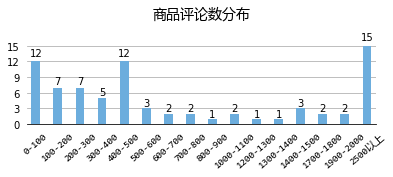

In [26]:
image = ImageBar(data=df_review_freq['review_count'],
                labels=df_review_freq['labels'],
                title='商品评论数分布',
                xticks_rotation=40)
image.init()
document.chapters[0].subchapters[2].set_image(image.fig)
image.fig

In [27]:
#口碑分布
rating_counts = df_data['Rating'].value_counts()
rating_counts.sort_index(inplace = True)
rating_counts_temp_0 = rating_counts[rating_counts.index>=3.5]
rating_counts_temp_0.sort_index(ascending=False,inplace = True)
rating_counts_temp_0['0.0'] = rating_counts[rating_counts.index<3.5].sum()
rating_counts = rating_counts_temp_0

def rating_to_range(rating):
    if float(rating) == 5.0:
        return '5.0'
    elif float(rating) >= 3.5:
        if abs(float(rating)-int(rating))<0.01:
            return '{}-{}'.format(int(rating),(rating+0.5))
        else:
            return '{}-{}'.format(rating,int(rating+0.5))
    else:
        return u'0-3.5'
labels = list(map(rating_to_range, rating_counts.index))
df_rating = pd.DataFrame(columns=['labels', 'count'])
df_rating.loc[:,'labels'] = labels
df_rating.loc[:,'count'] = rating_counts.values
df_rating = df_rating[df_rating['count'] != 0]

In [28]:
image = ImagePie(data=df_rating['count'],
                labels=df_rating['labels'],
                title='评论星级分布',
                title_y=1.08)
image.init()
image.ax.axis('equal')
document.chapters[0].subchapters[3].set_image(image.fig)
image.fig

In [29]:
value_counted = jsdata.bb_seller.data.value_counts()
value_counted = value_counted*100/value_counted.sum()

In [30]:
value_counted

FBA    60.0
AMZ    40.0
Name: Seller, dtype: float64

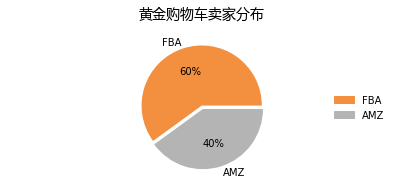

In [31]:
image = ImagePie(data=value_counted,
                labels=value_counted.index,
                title='黄金购物车卖家分布',
                title_y=1.08)
image.init()
image.ax.axis('equal')
document.chapters[0].subchapters[4].set_image(image.fig)
image.fig

In [32]:
if len(os.listdir('{}/sub_category/'.format(folder_path))) > 1:
    logging.info("该品类存在需要分析的子品类")
    %run subcategory_analysis.ipynb

有双轴需要设置副轴grid


In [33]:
from kpdata import df_indicator_trend 

有双轴需要设置副轴grid


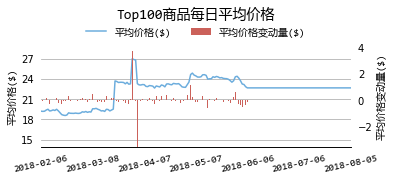

In [34]:
image = ImageFluctuation(data=df_indicator_trend[u'平均价格({})'.format(currency_symbol)],
                        y2=df_indicator_trend[u'平均价格变动量({})'.format(currency_symbol)],
                        labels=df_indicator_trend[u'日期'],
                        title=u'Top100商品每日平均价格',
                        legend_name=[u'平均价格({})'.format(currency_symbol), 
                                     u'平均价格变动量({})'.format(currency_symbol)],
                        xticks_rotation=12
                        )

image.init()
document.chapters[1].subchapters[0].set_image(image.fig)
image.fig

In [35]:
document.chapters[1].subchapters[0].title = """
1. 市场价格波动下降，可能存在低价竞争
"""
document.chapters[1].subchapters[0].content = """
近6个月内{}品类Best Sellers榜单Top100商品的平均价格为${:.2f}，
半年内最高平均价格为${:.2f}，最低平均价格为${:.2f}。价格波动{}，
市场价格波动下降，可能存在低价竞争。
""".format(jsdata.category_name,
           kpdata.price.mean,
           kpdata.price.max,
           kpdata.price.min,
           kpdata.price.std_verdict
          )

In [36]:
image = ImageLine(data=df_indicator_trend[u'平均评论数'],
                        labels=df_indicator_trend[u'日期'],
                        title=u'平均评论数变动',
                        xticks_rotation=12
                        )
image.set_xticks = types.MethodType(ImageFluctuation.set_xticks, image)
image.init()
document.chapters[1].subchapters[1].set_image(image.fig)
image.fig

有双轴需要设置副轴grid


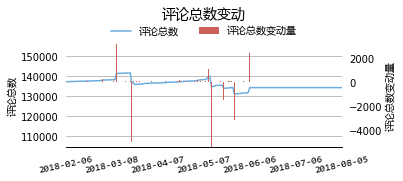

In [37]:
image = ImageFluctuation(data=df_indicator_trend[u'评论总数'],
                        y2=df_indicator_trend[u'评论总数变动量'],
                        labels=df_indicator_trend[u'日期'],
                        title=u'评论总数变动',
                        legend_name=[u'评论总数', u'评论总数变动量'],
                        xticks_rotation=12
                        )
# image.intervals = 2000
image.init()
# image.ax2.set_ylim(bottom=image.intervals2)
document.chapters[1].subchapters[1].add_image(image.fig)
image.fig

In [38]:
document.chapters[1].subchapters[1].content += '较大。'

In [39]:
def plot_update_distribution():
    from kpdata import added_time
    from datetime import timedelta
    date_target = datetime.now()
    deltaday = timedelta(181)
    date_since = date_target-deltaday
    series_data = added_time.trackingSince
    update_count = []
    labels = []
    for i in range(6):
        labels.append('{}月'.format((date_since+timedelta(i*31)).month))
        update_count.append(sum(
            (series_data >= (date_since+timedelta(i*30))) 
            & 
            (series_data < (date_since+timedelta(i*30+30)))
        )
                           )
    image = ImageBar(data=update_count,
                    labels=labels,
                    title='半年内上架商品的上架时间分布',
                    xticks_rotation=0,
                    legend_name=['商品数量'])
    image.xticks_font = image.prop['hei'].copy()
    image.init()
    image_filename = './image/1-1-2.png'
    image.fig.savefig(image_filename, dpi=160, bbox_inches='tight')
    document.chapters[1].subchapters[1].image_added = image_filename

In [40]:
if kpdata.added_time.added_product_count > 30:
    logging.info("添加半年内新上架商品信息")
    document.chapters[1].subchapters[1].content += "半年内上架商品的上架时间分布为："
    plot_update_distribution()

有双轴需要设置副轴grid


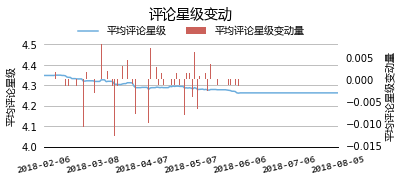

In [41]:
image = ImageFluctuation(data=df_indicator_trend[u'平均评论星级'],
                        y2=df_indicator_trend[u'平均评论星级变动量'],
                        labels=df_indicator_trend[u'日期'],
                        title=u'评论星级变动',
                        legend_name=[u'平均评论星级', u'平均评论星级变动量'],
                        xticks_rotation=12
                        )
image.intervals = 0.1
image.init()

image.ax.set_ylim(top=int((np.nanmean(image.y)+0.25)*10)/10, 
                  bottom=int((np.nanmean(image.y)-0.25)*10)/10)
document.chapters[1].subchapters[2].set_image(image.fig)
image.fig

In [42]:
# document.chapters[1].subchapters[2].title = """
# 3.评论星级波动下降，消费者对现有商品较为不满
# """
# document.chapters[1].subchapters[2].content = """
# {}品类Best Sellers榜单商品的评论星级波动下降，消费者对现有商品较为不满。
# """.format(category_name)

# document.chapters[1].subchapters[2].title = """
# 3.评论星级波动上升，消费者对现有商品较为满意
# """
# document.chapters[1].subchapters[2].content = """
# {}品类Best Sellers榜单商品的评论星级在近期波动上升，消费者对现有商品较为满意。
# """.format(category_name)

## 去除波动过大数据造成的影响

In [43]:
del df_indicator_trend

In [44]:
from kpdata import df_indicator_trend
array = df_indicator_trend[u'平均BSR变动量']
mean = np.nanmean(array)
for index, variation in enumerate(array):
    if index > 0:
        if abs(variation)>540000:
            print('Index: {}{}Variation: {}'.format(index,'\t'*4,variation))
            variation = 0
        df_indicator_trend.loc[index, u'平均BSR'] = df_indicator_trend.loc[index-1, u'平均BSR']+variation

In [45]:
image = ImageDoubleLine(data=df_indicator_trend[u'预测销售量'],
                        y2=df_indicator_trend[u'平均BSR'],
                        labels=df_indicator_trend[u'日期'],
                        title=u'平均BSR变动情况',
                        legend_name=[u'预测销售量', u'平均BSR'],
                        xticks_rotation=12
                        )
image.init()
image.ax2.invert_yaxis()
# image.ax.set_ylim(top=int((np.nanmean(image.y)+0.25)*10)/10, 
#                   bottom=int((np.nanmean(image.y)-0.25)*10)/10)
document.chapters[1].subchapters[3].set_image(image.fig)
image.fig

有双轴需要设置副轴grid


In [46]:
document.chapters[1].subchapters[3].title = """
4.市场销量非常不稳
"""
document.chapters[1].subchapters[3].content = """
根据{}品类的平均BSR的数据，可以看到
{}品类商品的预测平均效率和平均BSR都波动很大，市场非常不稳定。
""".format(jsdata.category_name,
           jsdata.category_name
          )

In [47]:
class Google_trends(object):
    def __init__(self):
        self.data = pd.read_csv('./data_or_source/multiTimeline.csv',
                                 skiprows=2)
        self.date_list = list(self.data['周'])
        self.start_day = self.format_date(self.date_list[0])
        self.last_day = self.format_date(self.date_list[-1])
        self.keywords = []
        self.keywords.append(self.data.columns[1].split(':')[0])
    
    def format_date(self, date_str):
        year, month, day = date_str.split('-')
        return '{}年{}月{}日'.format(year, int(month), day)
        
    def plot(self):
        google_data = self.data
        legends = google_data.columns[1:]
        if google_data.shape[1] == 3:
            self.keywords.append(self.data.columns[2].split(':')[0])
            self.image = ImageDoubleLine(data=google_data[legends[0]],
                                    y2=google_data[legends[1]],
                                    labels=google_data[google_data.columns[0]],
                                    legend_name=legends,
                                    title=u'品类相关谷歌趋势',
                                    xticks_rotation=12,
                                    ylabel_show=False
                                    )
        elif google_data.shape[1] == 2:
            self.image = ImageLine(data=google_data[legends[0]],
                                    labels=google_data[google_data.columns[0]],
                                    legend_name=legends[0],
                                    title=u'品类相关谷歌趋势',
                                    xticks_rotation=12,
                                    title_y=1.18
                                    )
        def set_xticks(self):
            plt.xticks(range(0,self.length,40), self.labels.loc[range(0,self.length,40)], fontproperties=self.xticks_font, rotation=self.xticks_rotation)
        self.image.set_xticks = types.MethodType(set_xticks, self.image)
        self.image.init()
        self.fig = self.image.fig

In [48]:
if os.path.isfile('./data_or_source/multiTimeline.csv'):
    google_trends = Google_trends()
    google_trends.plot()
    document.chapters[2].subchapters[0].set_image(google_trends.fig)
    document.chapters[2].title = '三、时事风向'
    document.chapters[2].subchapters[0].title = """1. Google趋势：{}
    """.format(jsdata.category_name)
    if google_trends.data.shape[1] == 2:
        document.chapters[2].subchapters[0].content = """
        根据从{}到{}{}品类相关关键词在{}国的Google趋势指数，
        可以看出主题{}的热度变化季节性很强，
        在每年的5月至8月份热度较高，是销售较好的时机。
        """.format(google_trends.start_day,
                   google_trends.last_day,
                   jsdata.category_name,
                   region[0],
                   google_trends.keywords[0]
                  )
    if google_trends.data.shape[1] == 3:
        document.chapters[2].subchapters[0].content = """
        根据从{}到{}{}品类相关关键词在{}国的Google趋势指数，
        可以看出关键词{}和{}的热度变化季节性很强，关键词Seat Cushion在每年的5月至8月份热度较高，是销售较好的时机。
        """.format(google_trends.start_day,
                   google_trends.last_day,
                   jsdata.category_name,
                   region[0],
                   google_trends.keywords[0],
                   google_trends.keywords[1]
                  )
    google_trends.image.fig

有双轴需要设置副轴grid


In [49]:
document.sales_month = '5月至8月'

In [50]:
ali_image_names = ['./image/ali.jpg', './image/ali.png']
for ali_image_name in ali_image_names:
    if os.path.isfile(ali_image_name):
        document.chapters[2].subchapters[1].images.append(ali_image_name)
        document.chapters[2].subchapters[1].title = """2. 阿里指数：腰靠"""
        document.chapters[2].subchapters[1].content = """
可以看到，相比于在2018年1月之前的激烈震荡，目标市场的供应指数在春节假期之后进入了将近3个月的快速上行期，市场供应热情在7月初重返高涨；而在采购方面，节后反弹迅速的市场采购热情则自2018年3月底达到近一年高峰值后开始略显震荡下行。预计在短期内，市场供应充足，且市场供应指数尚能遵循去年趋势获得进一步上行的空间，随着采购竞争力的逐步回落，出口产品的成本压价空间有望在近期扩大。
"""

In [51]:
price_review_choosed = []
for review in price_review_add.split('；'):
    if ('定价参考' in review) or ('市场空间' in review) or ('商品最多' in review):
        if '。' in review:
            price_review_choosed.append(review.split('。')[0]+'。')
        else:
            price_review_choosed.append((review))

In [52]:
price_review_choosed

['\n价格分布较为分散，\n在$18-$24的商品最多，有23款商品，不过市场已经较为饱和',
 '\n$30-$36有着最高的预测平均效率，有10款商品，尚存市场空间。']

In [53]:
document.chapters[3].title = '四、总结'
document.chapters[3].content = """{}( {} )
品类市场商品平均上架天数为{}天，产品更新迭代{}。
总体销售水平{}，销量分布{}，
销售量排名前10%的商品占据总销售量的{}%{}。
榜单中有{}个品牌，品牌{}，{}{}品类市场品牌竞争压力{}。
商品价格跨度{}，{}
{}。
总体评论数{}，{}商品竞争压力{}。
总评论数期末比期初增长{:.2f}%，增长{}。
产品平均评论星级{}，产品改进空间{}，{}。{}
根据根据Google趋势，{}
预计在短期内，{}
""".format(configs.category_name_chinese,
           configs.category_name,
           kpdata.added_time.added_duration_mean,
           kpdata.added_time.update_rate,
           jsdata.sales.sum_verdict,
           jsdata.sales.concentration_verdict,
           jsdata.sales.top_10_percentage,
           '，排名靠后的商品同样有销售机会' if (jsdata.sales.concentration_verdict=="非常分散"
                                or jsdata.sales.concentration_verdict=="较为分散") else '', 
           jsdata.brand.count, 
           jsdata.brand.count_verdict, 
           jsdata.brand.review, 
           jsdata.brand.review_added, 
           jsdata.brand.competitive_pressure,
           jsdata.price.span_verdict,
           '；'.join(price_review_choosed),
           document.chapters[1].subchapters[0].title.replace('1.', ''),
           jsdata.review.mean_verdict,
           jsdata.review.bestsellers,
           jsdata.review.competitive_pressure,
           kpdata.review.grow_rate*100,
           kpdata.review.grow_rate_verdict,
           jsdata.rating.mean_verdict,
           jsdata.rating.improved_space,
           document.chapters[1].subchapters[2].title.replace('3.', ''),
           jsdata.bb_seller.added_text,
           document.chapters[2].subchapters[0].content.split('可以看出')[-1],
           document.chapters[2].subchapters[1].content.split('预计在短期内，')[-1]
          )
print(document.chapters[3].content)

女士凉鞋( Women's Sandals )
品类市场商品平均上架天数为643天，产品更新迭代很慢。
总体销售水平很高，销量分布非常分散，
销售量排名前10%的商品占据总销售量的31.29%，排名靠后的商品同样有销售机会。
榜单中有58个品牌，品牌较多，其中Sanuk表现最好，有4款商品进入榜单，销量占总销量的15.12%，对其他品牌有较大优势，Crocs同样表现较好，有11款商品进入榜单，销量占总销量的10.14%，对其他品牌有较大优势，品类市场品牌竞争压力较大。
商品价格跨度较大，
价格分布较为分散，
在$18-$24的商品最多，有23款商品，不过市场已经较为饱和；
$30-$36有着最高的预测平均效率，有10款商品，尚存市场空间。

 市场价格波动下降，可能存在低价竞争
。
总体评论数很多，有16款评论量在2500以上的商品，商品竞争压力很大。
总评论数期末比期初增长-2.15%，增长很慢。
产品平均评论星级较高，产品改进空间较小， 评论星级波动较大，消费者的市场偏好较为不稳
。商品有60%来自于FBA，40%来自于AMZ，对跨境卖家较为友好。
根据根据Google趋势，关键词Watch Band和智能手表的热度变化季节性很强，关键词Seat Cushion在每年的5月至8月份热度较高，是销售较好的时机。
        
预计在短期内，市场供应充足，且市场供应指数尚能遵循去年趋势获得进一步上行的空间，随着采购竞争力的逐步回落，出口产品的成本压价空间有望在近期扩大。




In [54]:
document.chapters[3].content += """
总而言之，该品类市场空间很小，品牌竞争压力很大，商品竞争压力很小，可尝试追随热点商品发展；
不过销量分布集中且市场发展很慢，对新品发展很不友好，只适于有长期发展意愿的卖家；
产品尚存改进空间，且市场价格有下降趋势，高质高价的中档产品可作为突破口。
"""


In [55]:
document.business_opportunity_evaluation = """
对跨境卖家非常友好；
品类市场空间很小，品牌竞争压力很大，商品竞争压力很小，可尝试追随热点商品发展；
不过销量分布集中且市场发展很慢，对新品发展很不友好，只适于有长期发展意愿的卖家；
产品尚存改进空间，且市场价格有下降趋势，高质高价的中档产品可作为突破口
"""

In [56]:
document.foreword = """
腰靠靠垫可以提供更好的脊背支撑，帮助缓解背部疼痛和要不问题，适合有久坐需要的人群。
"""+document.foreword

In [57]:
document.save_html('./{}品类趋势分析报告.html'.format(category_name))

In [58]:
kpdata.added_time.data.loc[jsdata.data.ASIN[0:5]]

trackingSince added_time  review_count
B01H94Y3XE 2016-06-19 06:52:00        NaT           NaN
B008KK0ZJ8 2015-05-06 02:41:00        NaT           NaN
B016MD0VUW 2016-03-11 18:29:00        NaT           NaN
B01F184Q5A 2016-08-12 03:20:00        NaT           NaN
B002LZUS40 2012-06-30 17:00:00        NaT           NaN

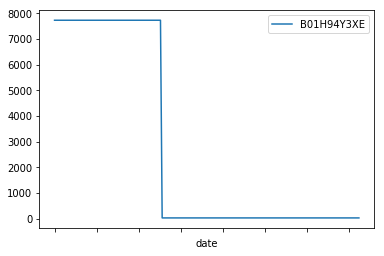

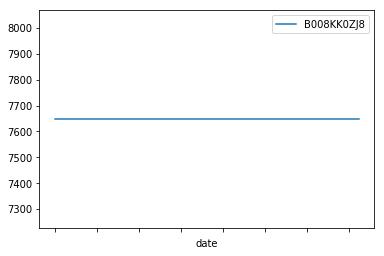

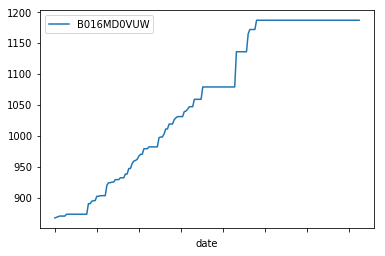

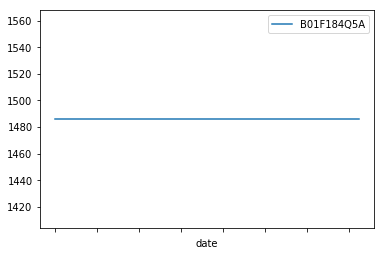

In [59]:
kpdata.review.plot_top5()

In [60]:
# import matplotlib.pyplot as plt
# for i in range(100):
#     asin = df_market_trends.asin.values[0+182*i]    
#     sales_list = df_market_trends.estimate_sales.values[0+i*182:181+i*182]

#     plt.figure(i)
#     plt.plot(sales_list)
#     plt.savefig('./special/{}.png'.format(asin))
#     plt.close(i)

In [61]:
# kpdata.added_time.data.to_csv('added_time.csv')